# Linear Regression

## Univariate linear regression

The code below generates a synthetic training dataset assuming that the response y is a linear function of an attribute x. This is referred to as a generative model.

Complete the code to determine the the optimal linear regression coefficients for the data that minimizes mean square error using (1) analytical expression we learned in class; and (2) using the "polyfit" and "polyval" functions from the numpy.polynomial.polynomial class.


### Generate Data

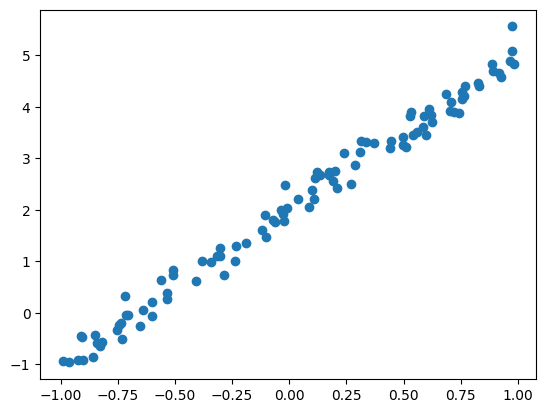

In [1]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

nsamp = 100;
wstd = 0.2;
beta = np.array([2,3]);

# Training data points
xd = np.random.uniform(-1,1,nsamp);
y0 = poly.polyval(xd,beta);
yd = y0 + np.random.normal(0,wstd,nsamp);

fig, ax = plt.subplots()
ax.scatter(xd, yd)

### Analytical Model

**Q1**: Complete the code below using closed form expressions for $\beta_0, \beta_1$.

In [2]:
#Analytical model
x_mean = np.mean(xd)
y_mean = np.mean(yd)

beta1 = np.sum((xd - x_mean) * (yd - y_mean)) / np.sum((xd - x_mean)**2)
beta0 = y_mean - beta1 * x_mean
analyticalModel = np.array([beta0,beta1])

### Evaluate Your Model

**Q2**: Obtain predictions from your analytical model for randomly generated inputs. Next use the in-built polyfit function to do the same.

**Analytical Model Result**

In [3]:
#evaluate your model

# Generating uniform points between -1 and 1 for evaluation
xplot = np.linspace(-1, 1, nsamp)

# Getting the prediction using the analytical model
ypredict = poly.polyval(xplot, analyticalModel)

**Polyfit Model Prediction**

In [4]:
# Using numpy's polyfit function to fit a first-degree polynomial
polyfitModel = np.polyfit(xd, yd, 1)

# Using polyval to evaluate the model at x = xplot
yfit = np.polyval(polyfitModel, xplot)

### Plot Result

**Q3**: Plot results of polyfit model and analytical model. The plots should contain both the (x,y) training data points and the fitted lines.

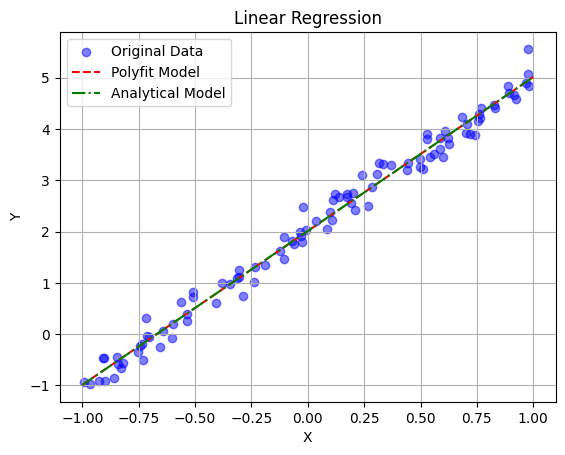

In [5]:
# Create the plot
fig, ax = plt.subplots()
ax.scatter(xd, yd, label='Original Data', color='blue', alpha=0.5)

# Plot polyfit model result
ax.plot(xplot, yfit, label='Polyfit Model', color='red', linestyle='--')

# Plot analytical model result
ax.plot(xplot, ypredict, label='Analytical Model', color='green', linestyle='-.')

ax.set(xlabel='X', ylabel='Y', title='Linear Regression')
ax.legend()
ax.grid()
plt.show()

## Application of Linear Regression

In this part, you'll use Linear Regression on a real-world dataset. The datatset contains sales number of a product versus the advertising of the product on TV, radio and newspaper. The question we want to ask is how advertising on each of these channels impacts sales.

### Read Data

**Q4**: Split data into train and test, by reserving **70** percent of the data for training and the rest for test.

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

url = 'https://www.statlearning.com/s/Advertising.csv'
df = pd.read_csv(url, index_col=0)
df.head()

train, test = train_test_split(df, test_size=0.3, random_state=42)

### Linear Regression Model

**Q5**: Use linear regression model to describe sales as a linear function  of advertising on TV, newspaper, and radio. That is, you should independently regress sales against advertising on each of these media.

In [7]:
from sklearn.linear_model import LinearRegression

# Linear regression for TV vs Sales
reg_TV = LinearRegression().fit(train[['TV']], train['sales'])
sales_TV_beta = [reg_TV.intercept_, reg_TV.coef_[0]]

# Linear regression for Newspaper vs Sales
reg_newspaper = LinearRegression().fit(train[['newspaper']], train['sales'])
sales_newspaper_beta = [reg_newspaper.intercept_, reg_newspaper.coef_[0]]

# Linear regression for Radio vs Sales
reg_radio = LinearRegression().fit(train[['radio']], train['sales'])
sales_radio_beta = [reg_radio.intercept_, reg_radio.coef_[0]]

sales_TV_beta, sales_newspaper_beta, sales_radio_beta

([7.239459830751138, 0.046407802128152764],
 [12.641828046262793, 0.06093416696535276],
 [9.338892006080656, 0.21926677369021058])

### Plot Data

**Q6**: Use the models to do prediction and plot *test* data points and predctions of 3 models

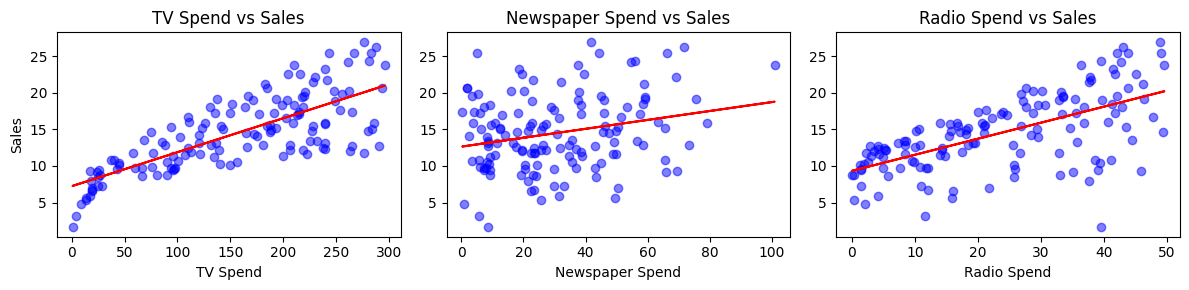

In [8]:
# Placeholder for the plotting code (since I don't have the actual data)
fig = plt.figure(figsize=(12,3))

## Sales to TV spend
plt.subplot(1,3,1)
plt.scatter(train['TV'], train['sales'], color='blue', alpha=0.5)
plt.plot(train['TV'], reg_TV.intercept_ + reg_TV.coef_[0]*train['TV'], color='red')
plt.title('TV Spend vs Sales')
plt.xlabel('TV Spend')
plt.ylabel('Sales')

## Sales to newspaper spend
plt.subplot(1,3,2)
plt.scatter(train['newspaper'], train['sales'], color='blue', alpha=0.5)
plt.plot(train['newspaper'], reg_newspaper.intercept_ + reg_newspaper.coef_[0]*train['newspaper'], color='red')
plt.title('Newspaper Spend vs Sales')
plt.xlabel('Newspaper Spend')

## Sales to radio spend
plt.subplot(1,3,3)
plt.scatter(train['radio'], train['sales'], color='blue', alpha=0.5)
plt.plot(train['radio'], reg_radio.intercept_ + reg_radio.coef_[0]*train['radio'], color='red')
plt.title('Radio Spend vs Sales')
plt.xlabel('Radio Spend')

# Displaying the plot
plt.tight_layout()
plt.show()


## Multivariate Linear Regression

**Q7**: Use all three features ('TV', 'Radio', newspaper') to predict sales using multivariate linear regression.

In [9]:
# Define training X matrix
X = np.vstack((np.ones(train['newspaper'].size), train['newspaper'], train['radio'], train['TV']))
trainX = X.transpose()

# Define training Y matrix
trainY = train['sales']

# Get your Model(Using the closed form in class)
multivariate_beta = np.linalg.inv(trainX.T @ trainX) @ trainX.T @ trainY

### Evaluate Model

**Q8**: use your multivariate model to do predictions on test data

In [10]:
# Define testing X matrix
X = np.vstack((np.ones(test['newspaper'].size), test['newspaper'], test['radio'], test['TV']))
testX = X.transpose()

# Define testing Y matrix
testY = test['sales']

# Predcit result using your model multivariate_beta
pred = testX @ multivariate_beta

### Plot Result

**Q9**: Plot your predictions against real labels.

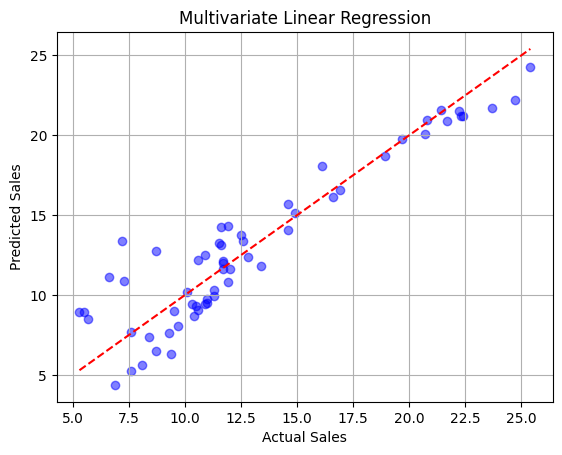

In [11]:
# Placeholder for the plotting code (since I don't have the actual and predicted values)

fig, ax = plt.subplots()

# Scatter plot of actual vs predicted sales
ax.scatter(testY, pred, color='blue', alpha=0.5)

# Line y=x for reference
ax.plot([min(testY), max(testY)], [min(testY), max(testY)], color='red', linestyle='--')

ax.set(xlabel='Actual Sales', ylabel='Predicted Sales',
       title='Multivariate Linear Regression')
ax.grid()
plt.show()
